In [ ]:
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
import keras.preprocessing.image
from keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
import keras.layers.normalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
from tensorflow.keras.utils import img_to_array

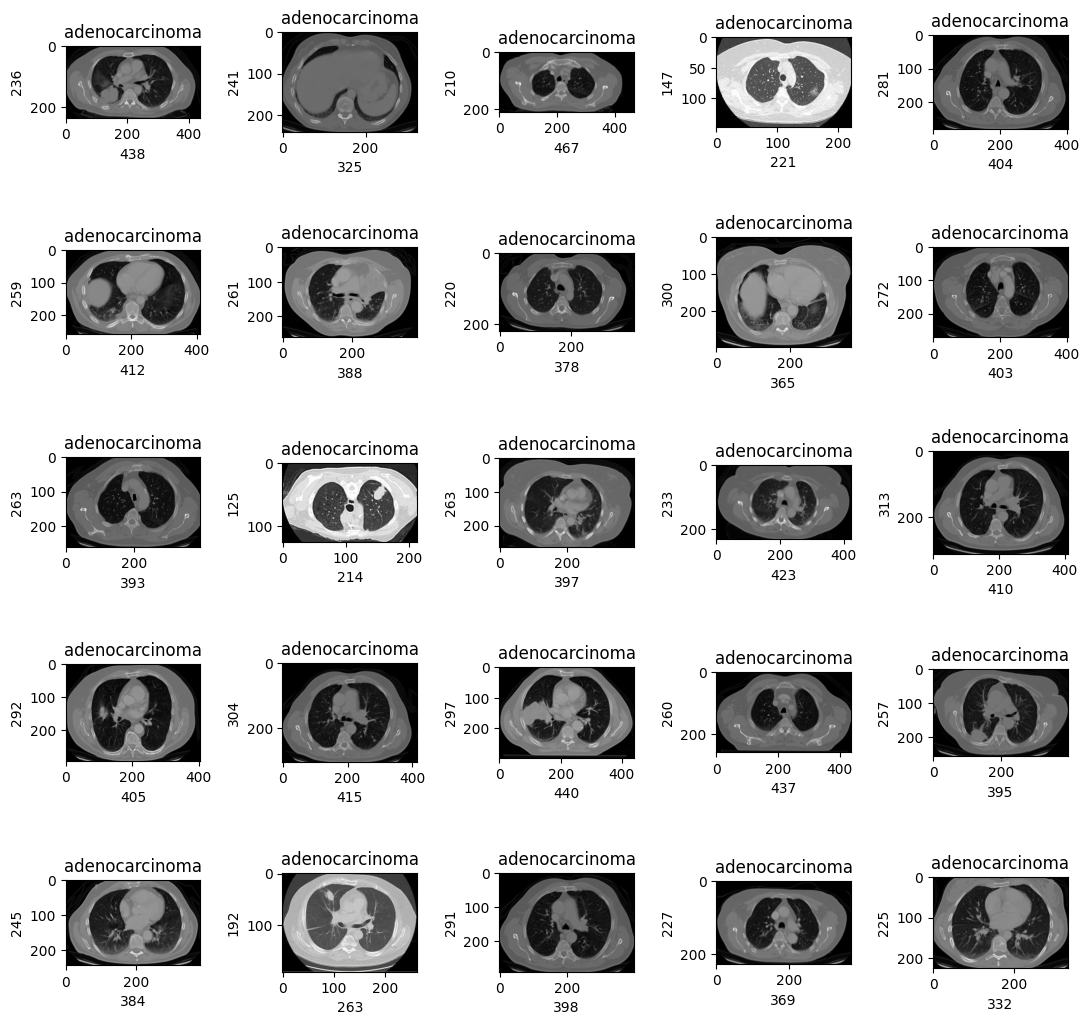

In [ ]:
plt.figure(figsize=(11,11))
path = "/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.title('adenocarcinoma')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [ ]:
dir = "/content/drive/MyDrive/Data/train"
root_dir = listdir(dir)
image_list, label_list = [], []

In [ ]:
root_dir

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [ ]:
ima=Image.open('/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png')
ima = ima.resize((150,150))
ims=asarray(ima)
ims



array([[[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  1,   1,   1, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       ...,

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0

In [ ]:
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = Image.open(image_path).convert('RGB')
    image = image.resize((150,150)) # All images does not have same dimension
    image =img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [ ]:
len(label_list),len(image_list)

(613, 613)

In [ ]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib          195
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa    155
normal                                              148
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       115
dtype: int64

In [ ]:
num_classes = len(label_counts)
num_classes

4

In [ ]:
(np.array(image_list)).shape

(613, 150, 150, 3)

In [ ]:
label_list = np.array(label_list)
label_list.shape

(613,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
yt=lb.fit_transform(y)
print(lb.classes_)

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa' 'normal'
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


In [ ]:
y_train

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 150,150,3)
x_test = x_test.reshape( -1, 150,150,3)

In [ ]:
model = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (150,150,3)),
        BatchNormalization(),
        LeakyReLU(),

        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),

        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Flatten(),

        Dense(64),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),

        Dense(32),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),

        Dense(16),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(1),

        Dense(4, activation = 'softmax')
        ])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 batch_normalization_49 (Bat  (None, 148, 148, 16)     64        
 chNormalization)                                                
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 148, 148, 16)      0         
                                                                 
 conv2d_30 (Conv2D)          (None, 146, 146, 32)      4640      
                                                                 
 batch_normalization_50 (Bat  (None, 146, 146, 32)     128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 146, 146, 32)     

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

In [ ]:
y_train.shape

(490, 4)

In [ ]:
x_train.shape

(490, 150, 150, 3)

In [ ]:
epochs = 70
batch_size = 128
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
16/16 [==============================] - 42s 3s/step - loss: 1.1530 - accuracy: 0.5143
Epoch 2/20
16/16 [==============================] - 38s 2s/step - loss: 0.9191 - accuracy: 0.6490
Epoch 3/20
16/16 [==============================] - 38s 2s/step - loss: 0.7655 - accuracy: 0.7224
Epoch 4/20
16/16 [==============================] - 37s 2s/step - loss: 0.6879 - accuracy: 0.7449
Epoch 5/20
16/16 [==============================] - 54s 3s/step - loss: 0.6157 - accuracy: 0.7776
Epoch 6/20
 9/16 [===============>..............] - ETA: 16s - loss: 0.5498 - accuracy: 0.8438